In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import os

if os.path.isfile("/content/drive/MyDrive/DS4A Team 14 - Fall 2022/EDA/Data and Notebook/CENSUS_DEMOGRAPHICS/DEMOGRAPHIC CHARACTERISTICS FOR OCCUPIED HOUSING UNITS.csv") == True:
  print('yep')
else:
  print('nope')

yep


In [131]:
df_demo = pd.read_csv("/content/drive/MyDrive/DS4A Team 14 - Fall 2022/EDA/Data and Notebook/CENSUS_DEMOGRAPHICS/DEMOGRAPHIC CHARACTERISTICS FOR OCCUPIED HOUSING UNITS.csv", delimiter=',')
df_demo.head()

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Percent occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Percent owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alabama!!Percent renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Percent occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,...,Puerto Rico!!Owner-occupied housing units!!Estimate,Puerto Rico!!Percent owner-occupied housing units!!Estimate,Puerto Rico!!Renter-occupied housing units!!Estimate,Puerto Rico!!Percent renter-occupied housing units!!Estimate,United States!!Occupied housing units!!Estimate,United States!!Percent occupied housing units!!Estimate,United States!!Owner-occupied housing units!!Estimate,United States!!Percent owner-occupied housing units!!Estimate,United States!!Renter-occupied housing units!!Estimate,United States!!Percent renter-occupied housing units!!Estimate
0,Occupied housing units,"1,967,559","1,967,559","1,377,932","1,377,932","589,627","589,627","271,311","271,311","181,145",...,"800,555","800,555","365,427","365,427","127,544,730","127,544,730","83,396,988","83,396,988","44,147,742","44,147,742"
1,RACE AND HISPANIC OR LATINO ORIGIN OF HOUS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,One race --,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White,"1,319,637",67.1%,"1,025,693",74.4%,"293,944",49.9%,"186,669",68.8%,"133,104",...,"226,086",28.2%,"94,968",26.0%,"85,344,506",66.9%,"61,958,636",74.3%,"23,385,870",53.0%
4,Black or African American,"511,624",26.0%,"268,710",19.5%,"242,914",41.2%,"8,247",3.0%,"2,241",...,"45,967",5.7%,"24,646",6.7%,"15,274,070",12.0%,"6,718,484",8.1%,"8,555,586",19.4%


# Preparing Dataset

In [132]:
#Drop unwanted columns
omit_names = ['.*Percent*.',
              '.*United States*.',
              '.*Puerto Rico*.',
              '.*Columbia*.']

#iterate thru the list and remove the columns
for item in omit_names:
  mask = df_demo.columns.str.contains(item)
  df_demo = df_demo.loc[:,~mask] #use the inverse of the mask to keep the columns that are False

df_demo.head(5)

,Label (Grouping),Alabama!!Occupied housing units!!Estimate,Alabama!!Owner-occupied housing units!!Estimate,Alabama!!Renter-occupied housing units!!Estimate,Alaska!!Occupied housing units!!Estimate,Alaska!!Owner-occupied housing units!!Estimate,Alaska!!Renter-occupied housing units!!Estimate,Arizona!!Occupied housing units!!Estimate,Arizona!!Owner-occupied housing units!!Estimate,Arizona!!Renter-occupied housing units!!Estimate,...,Washington!!Renter-occupied housing units!!Estimate,West Virginia!!Occupied housing units!!Estimate,West Virginia!!Owner-occupied housing units!!Estimate,West Virginia!!Renter-occupied housing units!!Estimate,Wisconsin!!Occupied housing units!!Estimate,Wisconsin!!Owner-occupied housing units!!Estimate,Wisconsin!!Renter-occupied housing units!!Estimate,Wyoming!!Occupied housing units!!Estimate,Wyoming!!Owner-occupied housing units!!Estimate,Wyoming!!Renter-occupied housing units!!Estimate
0,Occupied housing units,"1,967,559","1,377,932","589,627","271,311","181,145","90,166","2,817,723","1,905,690","912,033",...,"1,088,354","722,201","542,805","179,396","2,449,970","1,668,575","781,395","242,763","173,247","69,516"
1,RACE AND HISPANIC OR LATINO ORIGIN OF HOUS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,One race --,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White,"1,319,637","1,025,693","293,944","186,669","133,104","53,565","1,877,232","1,362,690","514,542",...,"704,246","665,809","510,750","155,059","2,080,701","1,512,740","567,961","213,080","155,071","58,009"
4,Black or African American,"511,624","268,710","242,914","8,247","2,241","6,006","117,444","47,918","69,526",...,"71,343","20,701","9,352","11,349","134,124","38,303","95,821","1,779",941,838


In [133]:
col_names = list(df_demo.columns)
col_names_dict = dict.fromkeys(col_names)
#rename first column
col_names_dict['Label (Grouping)'] = 'Label'

for key,value in col_names_dict.items():
    if '!!Occupied housing units!!Estimate' in key:
      newValue = key.replace('!!Occupied housing units!!Estimate', ' Total Occupied Units')
      col_names_dict[key] = newValue
    if '!!Owner-occupied housing units!!Estimate' in key:
      newValue = key.replace('!!Owner-occupied housing units!!Estimate', ' Owner Occupied Units')
      col_names_dict[key] = newValue
    if '!!Renter-occupied housing units!!Estimate' in key:
      newValue = key.replace('!!Renter-occupied housing units!!Estimate', ' Renter Occupied Units')
      col_names_dict[key] = newValue

#iterate through dictionary to rename the remaining rows
#for key,value in col_names_dict.items():
#  print(key,' ',value)
col_names_dict


{'Label (Grouping)': 'Label',
 'Alabama!!Occupied housing units!!Estimate': 'Alabama Total Occupied Units',
 'Alabama!!Owner-occupied housing units!!Estimate': 'Alabama Owner Occupied Units',
 'Alabama!!Renter-occupied housing units!!Estimate': 'Alabama Renter Occupied Units',
 'Alaska!!Occupied housing units!!Estimate': 'Alaska Total Occupied Units',
 'Alaska!!Owner-occupied housing units!!Estimate': 'Alaska Owner Occupied Units',
 'Alaska!!Renter-occupied housing units!!Estimate': 'Alaska Renter Occupied Units',
 'Arizona!!Occupied housing units!!Estimate': 'Arizona Total Occupied Units',
 'Arizona!!Owner-occupied housing units!!Estimate': 'Arizona Owner Occupied Units',
 'Arizona!!Renter-occupied housing units!!Estimate': 'Arizona Renter Occupied Units',
 'Arkansas!!Occupied housing units!!Estimate': 'Arkansas Total Occupied Units',
 'Arkansas!!Owner-occupied housing units!!Estimate': 'Arkansas Owner Occupied Units',
 'Arkansas!!Renter-occupied housing units!!Estimate': 'Arkansas Re

In [134]:
#rename columns
df_demo.rename(columns = col_names_dict, inplace=True)
df_demo.head(1)

,Label,Alabama Total Occupied Units,Alabama Owner Occupied Units,Alabama Renter Occupied Units,Alaska Total Occupied Units,Alaska Owner Occupied Units,Alaska Renter Occupied Units,Arizona Total Occupied Units,Arizona Owner Occupied Units,Arizona Renter Occupied Units,...,Washington Renter Occupied Units,West Virginia Total Occupied Units,West Virginia Owner Occupied Units,West Virginia Renter Occupied Units,Wisconsin Total Occupied Units,Wisconsin Owner Occupied Units,Wisconsin Renter Occupied Units,Wyoming Total Occupied Units,Wyoming Owner Occupied Units,Wyoming Renter Occupied Units
0,Occupied housing units,"1,967,559","1,377,932","589,627","271,311","181,145","90,166","2,817,723","1,905,690","912,033",...,"1,088,354","722,201","542,805","179,396","2,449,970","1,668,575","781,395","242,763","173,247","69,516"


In [135]:
df_demo.head(1)

,Label,Alabama Total Occupied Units,Alabama Owner Occupied Units,Alabama Renter Occupied Units,Alaska Total Occupied Units,Alaska Owner Occupied Units,Alaska Renter Occupied Units,Arizona Total Occupied Units,Arizona Owner Occupied Units,Arizona Renter Occupied Units,...,Washington Renter Occupied Units,West Virginia Total Occupied Units,West Virginia Owner Occupied Units,West Virginia Renter Occupied Units,Wisconsin Total Occupied Units,Wisconsin Owner Occupied Units,Wisconsin Renter Occupied Units,Wyoming Total Occupied Units,Wyoming Owner Occupied Units,Wyoming Renter Occupied Units
0,Occupied housing units,"1,967,559","1,377,932","589,627","271,311","181,145","90,166","2,817,723","1,905,690","912,033",...,"1,088,354","722,201","542,805","179,396","2,449,970","1,668,575","781,395","242,763","173,247","69,516"


In [136]:
#get the total number of rows
len(df_demo['Label'])

32

In [137]:
#see the list of labels to start reformatting dataframe
df_demo['Label']

0                                Occupied housing units
1         RACE AND HISPANIC OR LATINO ORIGIN OF HOUS...
2                                           One race --
3                                                 White
4                             Black or African American
5                     American Indian and Alaska Native
6                                                 Asian
7                 Native Hawaiian and Other Pacific ...
8                                       Some other race
9                                     Two or more races
10                            Hispanic or Latino origin
11                  White alone, not Hispanic or Latino
12                                   AGE OF HOUSEHOLDER
13                                       Under 35 years
14                                       35 to 44 years
15                                       45 to 54 years
16                                       55 to 64 years
17                                       65 to 7

In [138]:
#clean row names
df_demo = df_demo.replace(to_replace = u'\xa0', value = u'', regex = True)

df_demo['Label']

0                                Occupied housing units
1     RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER
2                                           One race --
3                                                 White
4                             Black or African American
5                     American Indian and Alaska Native
6                                                 Asian
7            Native Hawaiian and Other Pacific Islander
8                                       Some other race
9                                     Two or more races
10                            Hispanic or Latino origin
11                  White alone, not Hispanic or Latino
12                                   AGE OF HOUSEHOLDER
13                                       Under 35 years
14                                       35 to 44 years
15                                       45 to 54 years
16                                       55 to 64 years
17                                       65 to 7

In [139]:
#split the dataframe into a subset for renters versus owners
#create the column lists
col_names_2 = list(df_demo.columns)
renter_col = ['Label']
owner_col = ['Label']

for colName in col_names_2:
  if 'Renter' in colName:
    renter_col.append(colName)
  if 'Owner' in colName:
    owner_col.append(colName)

df_renter = df_demo[renter_col]
df_owner = df_demo[owner_col]



In [140]:
df_renter.head(5)

,Label,Alabama Renter Occupied Units,Alaska Renter Occupied Units,Arizona Renter Occupied Units,Arkansas Renter Occupied Units,California Renter Occupied Units,Colorado Renter Occupied Units,Connecticut Renter Occupied Units,Delaware Renter Occupied Units,Florida Renter Occupied Units,...,South Dakota Renter Occupied Units,Tennessee Renter Occupied Units,Texas Renter Occupied Units,Utah Renter Occupied Units,Vermont Renter Occupied Units,Virginia Renter Occupied Units,Washington Renter Occupied Units,West Virginia Renter Occupied Units,Wisconsin Renter Occupied Units,Wyoming Renter Occupied Units
0,Occupied housing units,"589,627","90,166","912,033","390,637","5,926,357","766,809","476,797","108,545","2,793,000",...,"109,257","901,349","4,035,245","333,437","73,872","1,079,291","1,088,354","179,396","781,395","69,516"
1,RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,One race --,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White,"293,944","53,565","514,542","233,693","2,380,713","524,203","251,891","50,941","1,325,664",...,"84,200","549,192","1,733,351","253,382","65,098","562,070","704,246","155,059","567,961","58,009"
4,Black or African American,"242,914","6,006","69,526","97,605","520,700","48,285","82,261","34,719","580,673",...,"3,690","240,740","811,666","7,563","1,162","319,295","71,343","11,349","95,821",838


In [141]:
df_owner.head(5)

,Label,Alabama Owner Occupied Units,Alaska Owner Occupied Units,Arizona Owner Occupied Units,Arkansas Owner Occupied Units,California Owner Occupied Units,Colorado Owner Occupied Units,Connecticut Owner Occupied Units,Delaware Owner Occupied Units,Florida Owner Occupied Units,...,South Dakota Owner Occupied Units,Tennessee Owner Occupied Units,Texas Owner Occupied Units,Utah Owner Occupied Units,Vermont Owner Occupied Units,Virginia Owner Occupied Units,Washington Owner Occupied Units,West Virginia Owner Occupied Units,Wisconsin Owner Occupied Units,Wyoming Owner Occupied Units
0,Occupied housing units,"1,377,932","181,145","1,905,690","793,038","7,502,706","1,546,233","951,516","287,111","5,772,329",...,"247,630","1,869,046","6,761,002","768,062","196,291","2,252,170","1,933,901","542,805","1,668,575","173,247"
1,RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,One race --,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,White,"1,025,693","133,104","1,362,690","634,711","4,067,917","1,243,444","754,988","214,390","4,033,481",...,"226,702","1,554,925","3,979,381","660,140","186,732","1,619,800","1,500,195","510,750","1,512,740","155,071"
4,Black or African American,"268,710","2,241","47,918","78,734","286,771","35,261","58,563","41,048","563,146",...,"1,252","189,679","571,578","3,384",533,"300,032","38,962","9,352","38,303",941


In [142]:
df_renter['Label']

0                                Occupied housing units
1     RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER
2                                           One race --
3                                                 White
4                             Black or African American
5                     American Indian and Alaska Native
6                                                 Asian
7            Native Hawaiian and Other Pacific Islander
8                                       Some other race
9                                     Two or more races
10                            Hispanic or Latino origin
11                  White alone, not Hispanic or Latino
12                                   AGE OF HOUSEHOLDER
13                                       Under 35 years
14                                       35 to 44 years
15                                       45 to 54 years
16                                       55 to 64 years
17                                       65 to 7

In [143]:
#transpose the data to flip columns and rows
#create the new column names
renter_col_names = ['State']
for l in list(df_renter['Label']):
  renter_col_names.append(l)
#transpose, rename, and drop the label row
df_renter_t = df_renter.transpose().reset_index()
df_renter_t.columns = renter_col_names
df_renter_t = df_renter_t.drop(0)
df_renter_t.head(5)



,State,Occupied housing units,RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER,One race --,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,...,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,YEAR HOUSEHOLDER MOVED INTO UNIT,Moved in 2019 or later,Moved in 2015 to 2018,Moved in 2010 to 2014,Moved in 2000 to 2009,Moved in 1990 to 1999,Moved in 1989 or earlier
1,Alabama Renter Occupied Units,"589,627",NaN,NaN,"293,944","242,914","2,765","6,831",504,"13,640",...,"187,303","197,390","119,371",NaN,"294,570","166,145","59,782","43,382","12,410","13,338"
2,Alaska Renter Occupied Units,"90,166",NaN,NaN,"53,565","6,006","10,290","5,514","1,873","3,571",...,"27,745","35,074","21,799",NaN,"49,126","24,451","8,005","6,297","1,319",968
3,Arizona Renter Occupied Units,"912,033",NaN,NaN,"514,542","69,526","39,397","33,833","1,680","84,666",...,"210,873","336,050","256,154",NaN,"514,367","240,471","92,674","45,413","12,747","6,361"
4,Arkansas Renter Occupied Units,"390,637",NaN,NaN,"233,693","97,605","2,298","6,619","2,149","9,362",...,"135,640","127,128","76,858",NaN,"215,536","102,330","37,370","23,218","5,950","6,233"
5,California Renter Occupied Units,"5,926,357",NaN,NaN,"2,380,713","520,700","87,247","772,821","24,539","1,126,040",...,"1,185,353","1,759,838","1,990,537",NaN,"2,387,077","1,605,138","941,120","658,841","233,516","100,665"


In [146]:
#transpose the data to flip columns and rows
#create the new column names
owner_col_names = ['State']
for l in list(df_owner['Label']):
  owner_col_names.append(l)
#transpose, rename, and drop the label row
df_owner_t = df_owner.transpose().reset_index()
df_owner_t.columns = owner_col_names
df_owner_t = df_owner_t.drop(0)
df_owner_t.head(5)

,State,Occupied housing units,RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER,One race --,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,...,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,YEAR HOUSEHOLDER MOVED INTO UNIT,Moved in 2019 or later,Moved in 2015 to 2018,Moved in 2010 to 2014,Moved in 2000 to 2009,Moved in 1990 to 1999,Moved in 1989 or earlier
1,Alabama Owner Occupied Units,"1,377,932",NaN,NaN,"1,025,693","268,710","5,431","15,578",513,"14,379",...,"377,508","414,663","467,591",NaN,"209,398","259,359","181,842","313,819","196,068","217,446"
2,Alaska Owner Occupied Units,"181,145",NaN,NaN,"133,104","2,241","17,333","6,995","1,110","2,001",...,"38,914","62,140","73,266",NaN,"32,406","32,458","27,524","43,062","24,164","21,531"
3,Arizona Owner Occupied Units,"1,905,690",NaN,NaN,"1,362,690","47,918","51,087","58,345","1,721","125,606",...,"351,015","651,893","756,197",NaN,"407,386","464,896","285,629","405,611","202,485","139,683"
4,Arkansas Owner Occupied Units,"793,038",NaN,NaN,"634,711","78,734","3,302","9,077",612,"14,646",...,"232,367","250,922","244,651",NaN,"137,948","155,377","113,038","176,074","104,310","106,291"
5,California Owner Occupied Units,"7,502,706",NaN,NaN,"4,067,917","286,771","72,197","1,220,684","19,741","828,120",...,"1,129,982","2,181,676","3,522,598",NaN,"1,077,642","1,324,614","1,108,463","1,720,949","1,126,632","1,144,406"


Now that the dataset the datasets are transposed and separated into renters and owners lets see if there are differences between who is a renter and who is an ownder

# Analyize by Age

First lets look at age. What age group is more likely to be a renter

In [147]:
ages = ['State','Under 35 years',
        '35 to 44 years',
        '45 to 54 years',
        '55 to 64 years',
        '65 to 74 years',
        '75 to 84 years',
        '85 years and over']

df_renter_ages = df_renter_t[ages]
df_renter_ages = df_renter_ages.replace(to_replace = ',', value = '', regex = True)
df_renter_ages.head(5)

,State,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over
1,Alabama Renter Occupied Units,206721,113889,88831,84788,61695,23777,9926
2,Alaska Renter Occupied Units,40607,16155,12487,10702,6536,2678,1001
3,Arizona Renter Occupied Units,358564,174848,128561,112261,74422,40757,22620
4,Arkansas Renter Occupied Units,146171,75751,54458,56111,32111,19012,7023
5,California Renter Occupied Units,1814766,1339199,1051600,817632,534638,249165,119357


In [149]:
df_renter_ages[['Under 35 years',
                                '35 to 44 years',
                                '45 to 54 years',
                                '55 to 64 years',
                                '65 to 74 years',
                                '75 to 84 years',
                                '85 years and over']] = df_renter_ages[['Under 35 years',
                                                                        '35 to 44 years',
                                                                        '45 to 54 years',
                                                                        '55 to 64 years',
                                                                        '65 to 74 years',
                                                                        '75 to 84 years',
                                                                        '85 years and over']].astype(int)

In [150]:
df_renter_ages.set_index('State', inplace = True)

In [151]:
df_renter_ages.index

Index(['Alabama Renter Occupied Units', 'Alaska Renter Occupied Units',
       'Arizona Renter Occupied Units', 'Arkansas Renter Occupied Units',
       'California Renter Occupied Units', 'Colorado Renter Occupied Units',
       'Connecticut Renter Occupied Units', 'Delaware Renter Occupied Units',
       'Florida Renter Occupied Units', 'Georgia Renter Occupied Units',
       'Hawaii Renter Occupied Units', 'Idaho Renter Occupied Units',
       'Illinois Renter Occupied Units', 'Indiana Renter Occupied Units',
       'Iowa Renter Occupied Units', 'Kansas Renter Occupied Units',
       'Kentucky Renter Occupied Units', 'Louisiana Renter Occupied Units',
       'Maine Renter Occupied Units', 'Maryland Renter Occupied Units',
       'Massachusetts Renter Occupied Units', 'Michigan Renter Occupied Units',
       'Minnesota Renter Occupied Units', 'Mississippi Renter Occupied Units',
       'Missouri Renter Occupied Units', 'Montana Renter Occupied Units',
       'Nebraska Renter Occupied

Text(0, 0.5, 'Total')

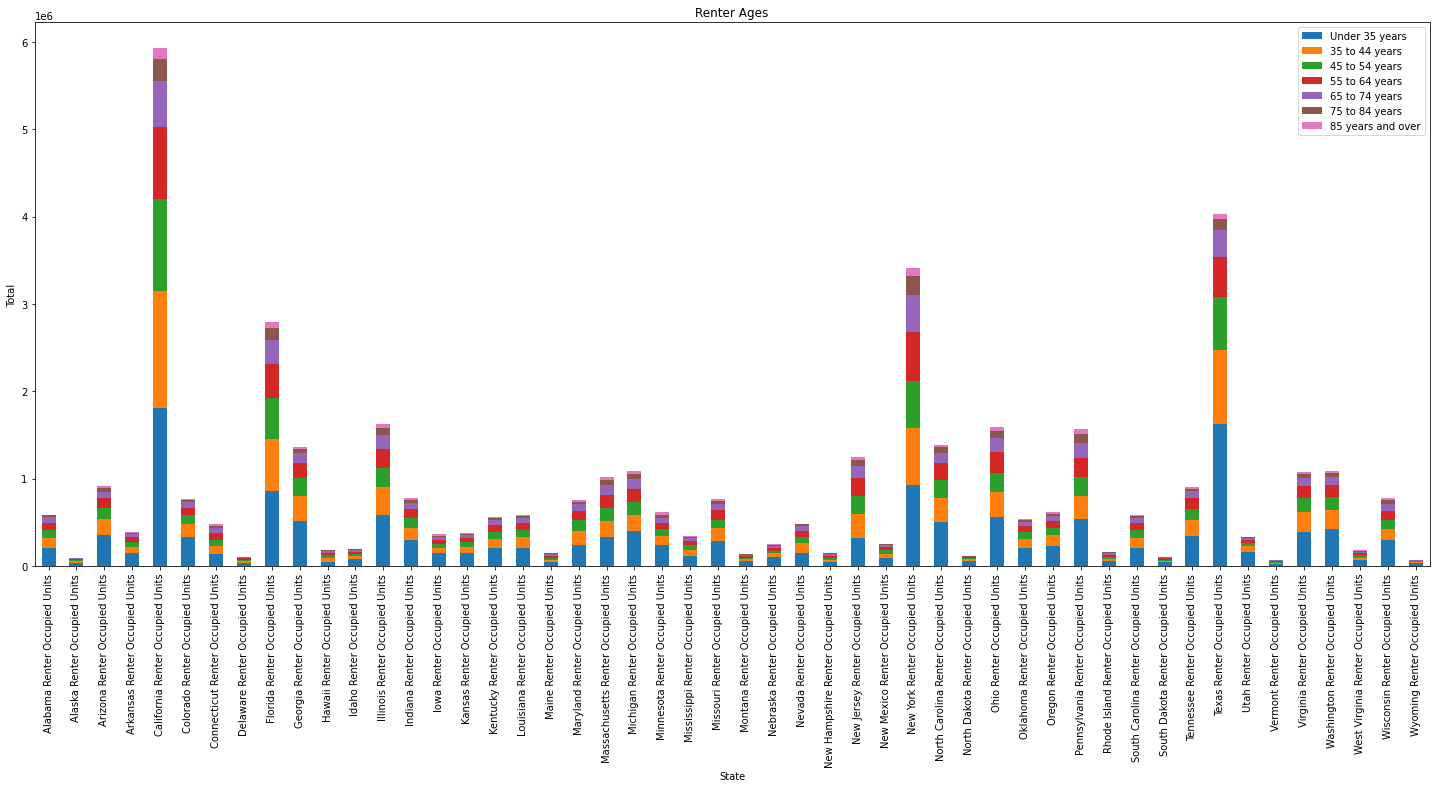

In [23]:
#plot a stacked bar for renters
fig, ax = plt.subplots(figsize=(25, 10))

df_renter_ages.plot(kind='bar', stacked=True, ax=ax) 

# Add Title and Labels
plt.title('Renter Ages')
plt.xlabel('State')
plt.ylabel('Total')

HOMEOWNERS

In [24]:
ages = ['State','Under 35 years',
        '35 to 44 years',
        '45 to 54 years',
        '55 to 64 years',
        '65 to 74 years',
        '75 to 84 years',
        '85 years and over']

df_owner_ages = df_owner_t[ages]
df_owner_ages = df_owner_ages.replace(to_replace = ',', value = '', regex = True)
df_owner_ages.head(5)

,State,Under 35 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 to 84 years,85 years and over
1,Alabama Owner Occupied Units,148405,207477,249293,305015,276956,147823,42963
2,Alaska Owner Occupied Units,22332,36080,31642,41840,34356,12175,2720
3,Arizona Owner Occupied Units,212393,289030,332564,394656,398915,219445,58687
4,Arkansas Owner Occupied Units,92415,124182,139105,168115,159254,85226,24741
5,California Owner Occupied Units,605808,1235015,1473308,1714133,1465217,738892,270333


In [25]:
df_owner_ages[['Under 35 years',
                                '35 to 44 years',
                                '45 to 54 years',
                                '55 to 64 years',
                                '65 to 74 years',
                                '75 to 84 years',
                                '85 years and over']] = df_owner_ages[['Under 35 years',
                                                                        '35 to 44 years',
                                                                        '45 to 54 years',
                                                                        '55 to 64 years',
                                                                        '65 to 74 years',
                                                                        '75 to 84 years',
                                                                        '85 years and over']].astype(int)

In [26]:
df_owner_ages.set_index('State', inplace = True)

Text(0, 0.5, 'Total')

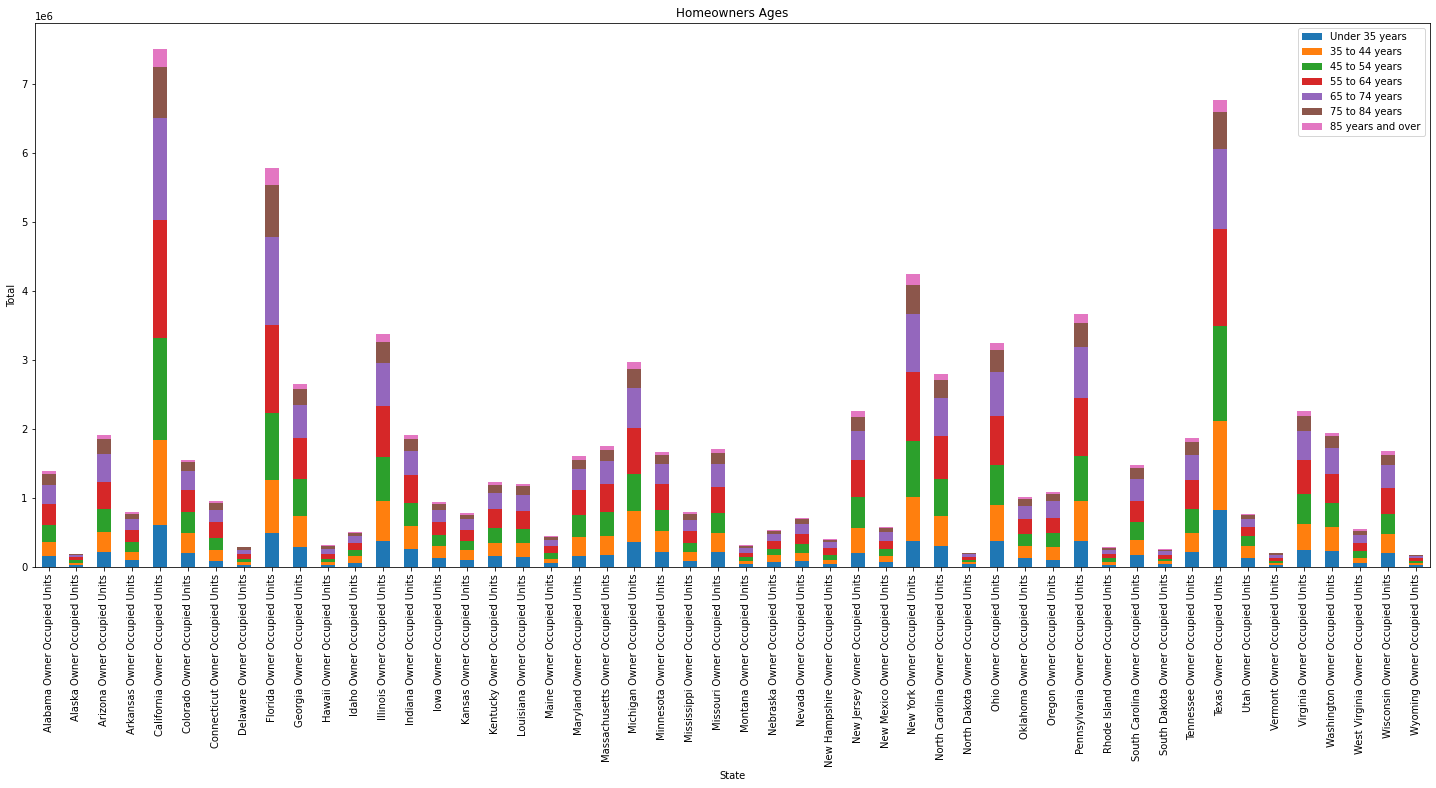

In [27]:
#plot a stacked bar for renters
fig, ax = plt.subplots(figsize=(25, 10))

df_owner_ages.plot(kind='bar', stacked=True, ax=ax) 

# Add Title and Labels
plt.title('Homeowners Ages')
plt.xlabel('State')
plt.ylabel('Total')

It might be easier to see the data as a line plot to tell each age group by state apart

In [59]:
y_val = ['Under 35 years','35 to 44 years','45 to 54 years','55 to 64 years','65 to 74 years','75 to 84 years','85 years and over']


df_r_ages = df_renter_ages.reset_index()
#melt the dataset to unpivot data
df_r_ages_melt = pd.melt(df_r_ages, id_vars = ['State']).sort_values(by=['value'], ascending=False)
df_r_ages_melt.head(10)

,State,variable,value
4,California Renter Occupied Units,Under 35 years,1814766
42,Texas Renter Occupied Units,Under 35 years,1626223
54,California Renter Occupied Units,35 to 44 years,1339199
104,California Renter Occupied Units,45 to 54 years,1051600
31,New York Renter Occupied Units,Under 35 years,923715
8,Florida Renter Occupied Units,Under 35 years,860741
92,Texas Renter Occupied Units,35 to 44 years,850400
154,California Renter Occupied Units,55 to 64 years,817632
81,New York Renter Occupied Units,35 to 44 years,652034
142,Texas Renter Occupied Units,45 to 54 years,602662


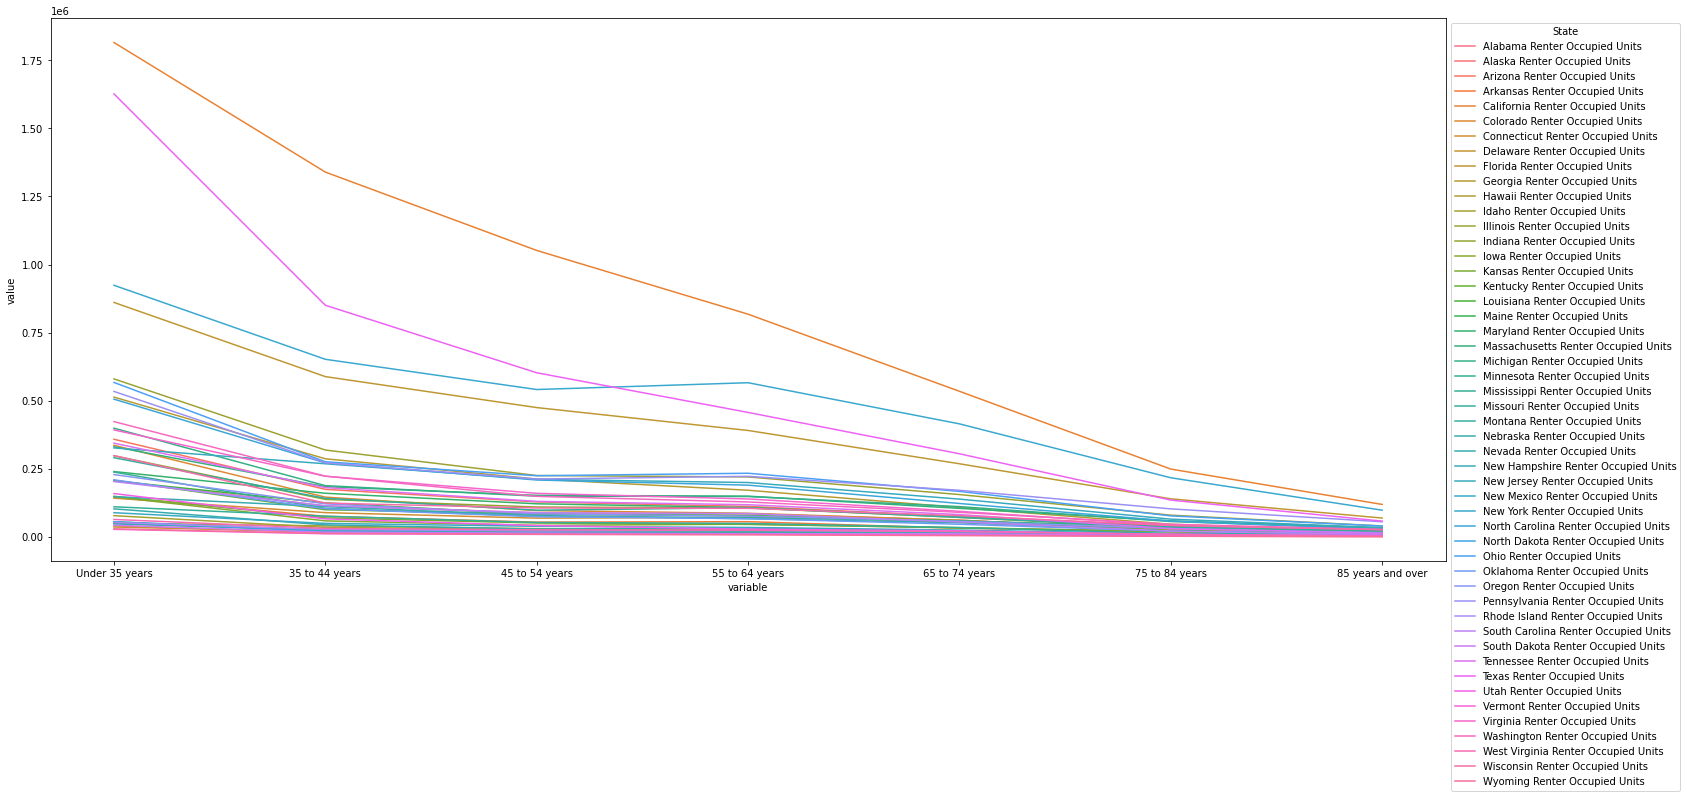

In [29]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.lineplot(data = df_r_ages_melt, x= 'variable', y='value', hue='State',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

As age increases the likelyhood of being a renter decreases. Below analyze the homewoners to see if age increases homeownership

In [60]:
y_val = ['Under 35 years','35 to 44 years','45 to 54 years','55 to 64 years','65 to 74 years','75 to 84 years','85 years and over']


df_o_ages = df_owner_ages.reset_index()
#melt the dataset to unpivot data
df_o_ages_melt = pd.melt(df_o_ages, id_vars = ['State']).sort_values(by=['value'], ascending=False)
df_o_ages_melt.head(10)

,State,variable,value
154,California Owner Occupied Units,55 to 64 years,1714133
104,California Owner Occupied Units,45 to 54 years,1473308
204,California Owner Occupied Units,65 to 74 years,1465217
192,Texas Owner Occupied Units,55 to 64 years,1412478
142,Texas Owner Occupied Units,45 to 54 years,1369442
92,Texas Owner Occupied Units,35 to 44 years,1296165
158,Florida Owner Occupied Units,55 to 64 years,1281520
208,Florida Owner Occupied Units,65 to 74 years,1273472
54,California Owner Occupied Units,35 to 44 years,1235015
242,Texas Owner Occupied Units,65 to 74 years,1156096


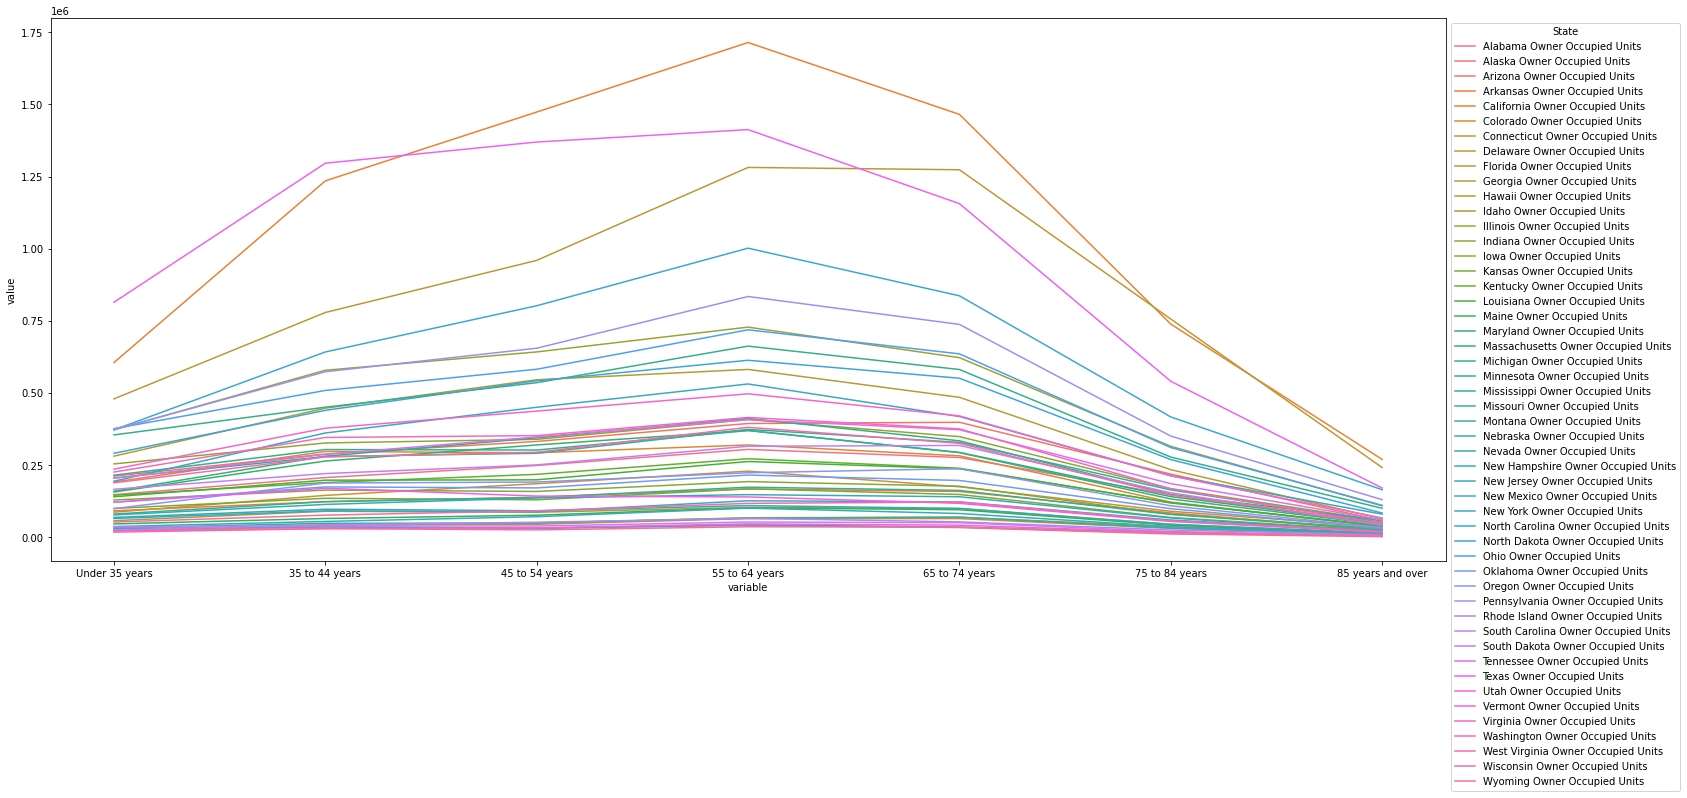

In [31]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.lineplot(data = df_o_ages_melt, x= 'variable', y='value', hue='State',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [83]:
df_owner_temp = df_o_ages_melt

df_owner_temp['State Name'] = df_owner_temp['State'].replace(' Owner Occupied Units','',regex = True)
df_owner_temp = df_owner_temp.drop(['State'], axis = 1)
df_owner_temp.rename(columns={'State Name':'State','variable':'Age Group','value':'Owners'},inplace=True)
df_owner_temp


,Age Group,Owners,State
154,55 to 64 years,1714133,California
104,45 to 54 years,1473308,California
204,65 to 74 years,1465217,California
192,55 to 64 years,1412478,Texas
142,45 to 54 years,1369442,Texas
...,...,...,...
340,85 years and over,6093,South Dakota
349,85 years and over,5889,Wyoming
333,85 years and over,5764,North Dakota
344,85 years and over,5484,Vermont


In [82]:
df_renter_temp = df_r_ages_melt

df_renter_temp['State Name'] = df_renter_temp['State'].replace(' Renter Occupied Units','',regex = True)
df_renter_temp = df_renter_temp.drop(['State'], axis = 1)
df_renter_temp.rename(columns={'State Name':'State','variable':'Age Group','value':'Renters'},inplace=True)
df_renter_temp

,Age Group,Renters,State
4,Under 35 years,1814766,California
42,Under 35 years,1626223,Texas
54,35 to 44 years,1339199,California
104,45 to 54 years,1051600,California
31,Under 35 years,923715,New York
...,...,...,...
347,85 years and over,2703,West Virginia
251,75 to 84 years,2678,Alaska
299,75 to 84 years,2618,Wyoming
349,85 years and over,1517,Wyoming


In [84]:
#merge the above datasets
df_merge_age = pd.merge(df_owner_temp, df_renter_temp, on=['State', 'Age Group'])
df_merge_age

,Age Group,Owners,State,Renters
0,55 to 64 years,1714133,California,817632
1,45 to 54 years,1473308,California,1051600
2,65 to 74 years,1465217,California,534638
3,55 to 64 years,1412478,Texas,457088
4,45 to 54 years,1369442,Texas,602662
...,...,...,...,...
345,85 years and over,6093,South Dakota,5881
346,85 years and over,5889,Wyoming,1517
347,85 years and over,5764,North Dakota,4858
348,85 years and over,5484,Vermont,3086


[Text(0, 0, 'Under 35 years'),
 Text(0, 0, '35 to 44 years'),
 Text(0, 0, '45 to 54 years'),
 Text(0, 0, '55 to 64 years'),
 Text(0, 0, '65 to 74 years'),
 Text(0, 0, '75 to 84 years'),
 Text(0, 0, '85 years and over')]

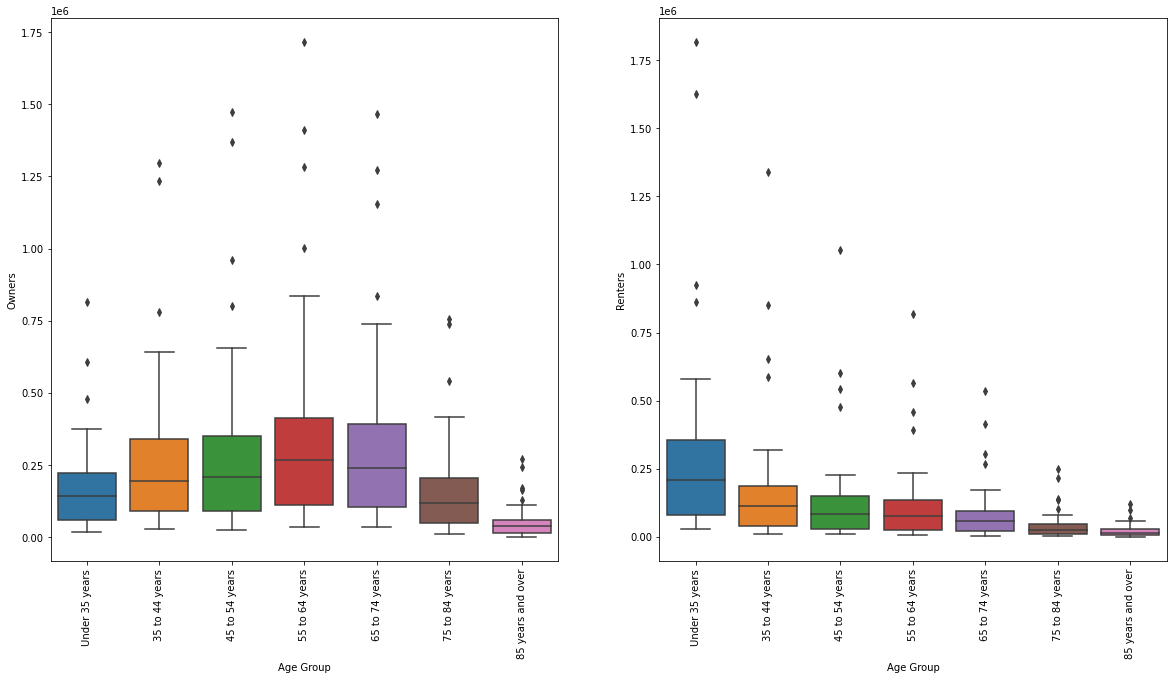

In [173]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(20, 10))

order_col = ['Under 35 years','35 to 44 years','45 to 54 years','55 to 64 years','65 to 74 years','75 to 84 years','85 years and over']

box_o = sns.boxplot(x="Age Group", y="Owners", order=order_col, data=df_merge_age,ax=ax[0])
box_r = sns.boxplot(x="Age Group", y="Renters", order=order_col, data=df_merge_age,ax=ax[1])
box_o.set_xticklabels(box_o.get_xticklabels(), rotation=90)
box_r.set_xticklabels(box_r.get_xticklabels(), rotation=90)

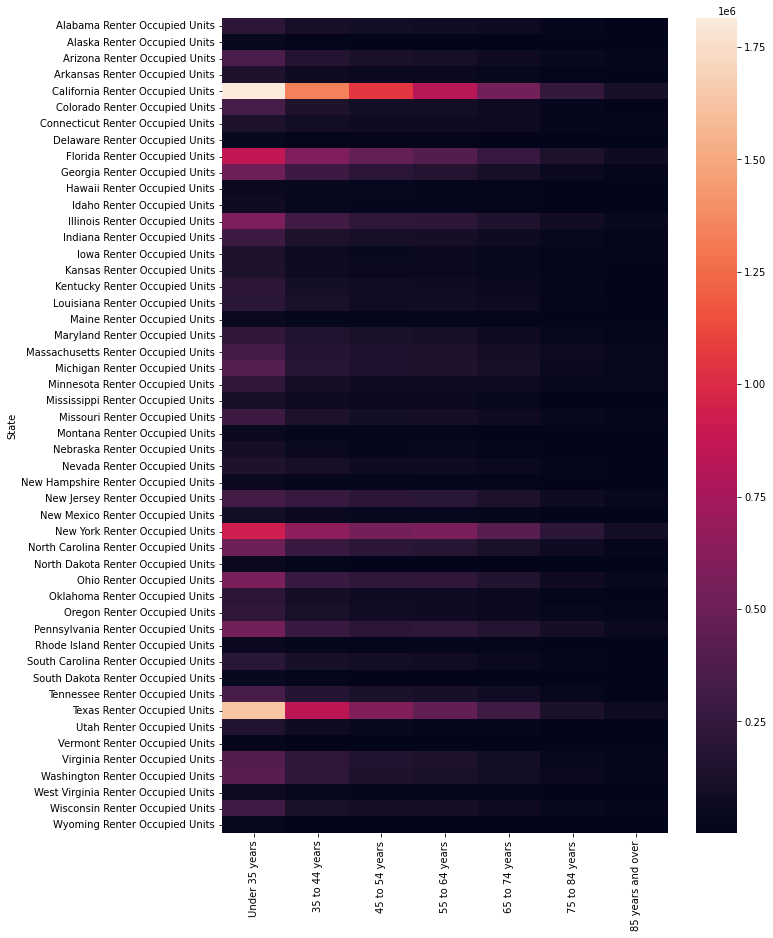

In [172]:
fig, ax = plt.subplots(figsize=(10, 15))

heat_renter = sns.heatmap(df_renter_ages,square=False, ax=ax)


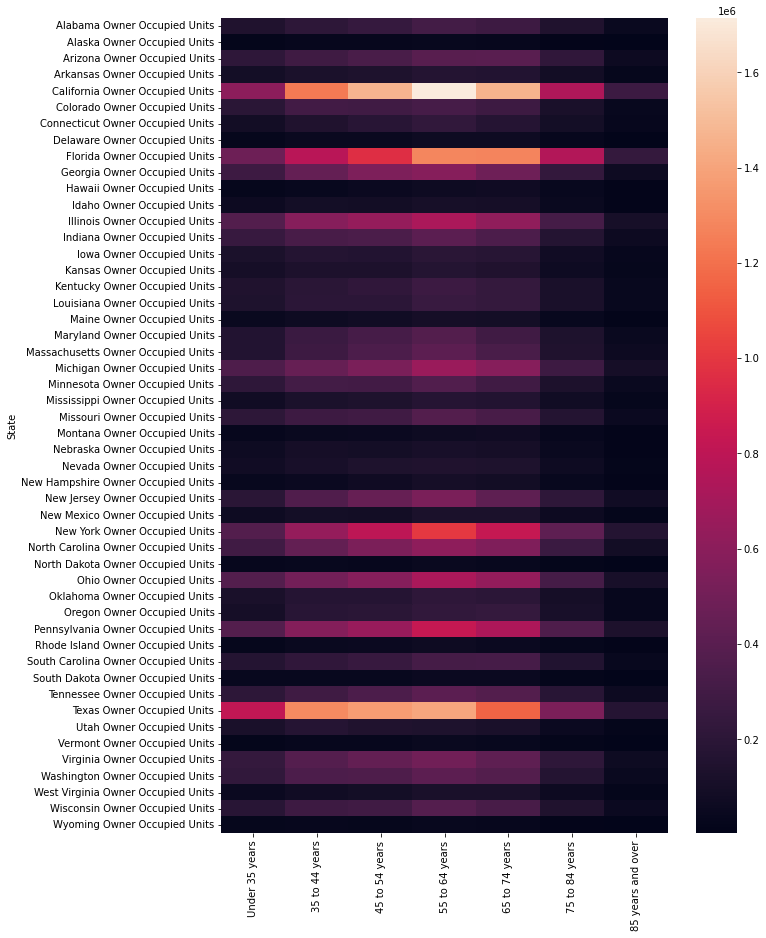

In [174]:
fig, ax = plt.subplots(figsize=(10, 15))

heat_owner = sns.heatmap(df_owner_ages,square=False, ax=ax)

From the box plots age plays in role in homeownership

As expected homeownership increases with age between 35-64 years, but after that homeownership decreases. At this age some people might move in with relatives without a rental agreement or move into an assisted living facility

# Analyze by Education


In [32]:
edu = ['State','Less than high school graduate','High school graduate (includes equivalency)',"Some college or associate's degree","Bachelor's degree or higher"]

df_renter_edu = df_renter_t[edu]
df_renter_edu = df_renter_edu.replace(to_replace = ',', value = '', regex = True)
df_renter_edu.head(5)

,State,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
1,Alabama Renter Occupied Units,85563,187303,197390,119371
2,Alaska Renter Occupied Units,5548,27745,35074,21799
3,Arizona Renter Occupied Units,108956,210873,336050,256154
4,Arkansas Renter Occupied Units,51011,135640,127128,76858
5,California Renter Occupied Units,990629,1185353,1759838,1990537


In [33]:
#change datatype to int
df_renter_edu[['Less than high school graduate',
               'High school graduate (includes equivalency)',
               "Some college or associate's degree",
               "Bachelor's degree or higher"]] = df_renter_edu[['Less than high school graduate','High school graduate (includes equivalency)',"Some college or associate's degree","Bachelor's degree or higher"]].astype(int)

In [34]:
df_renter_edu.set_index('State', inplace = True)

Text(0, 0.5, 'Total')

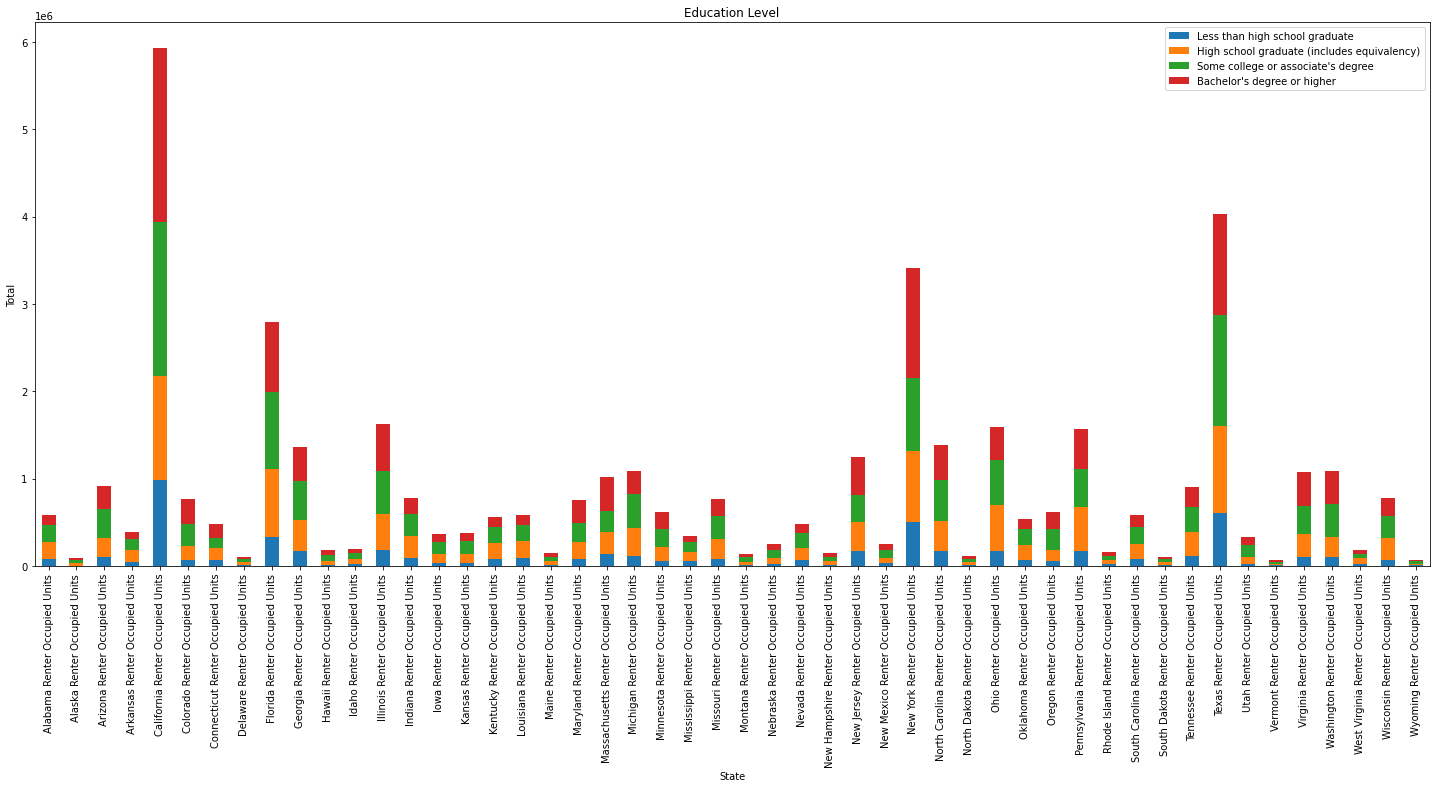

In [35]:
#plot a stacked bar for renters
fig, ax = plt.subplots(figsize=(25, 10))

df_renter_edu.plot(kind='bar', stacked=True, ax=ax) 

# Add Title and Labels
plt.title('Education Level')
plt.xlabel('State')
plt.ylabel('Total')

In [36]:
edu = ['State','Less than high school graduate','High school graduate (includes equivalency)',"Some college or associate's degree","Bachelor's degree or higher"]

df_owner_edu = df_owner_t[edu]
df_owner_edu = df_owner_edu.replace(to_replace = ',', value = '', regex = True)
df_owner_edu.head(5)

,State,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher
1,Alabama Owner Occupied Units,118170,377508,414663,467591
2,Alaska Owner Occupied Units,6825,38914,62140,73266
3,Arizona Owner Occupied Units,146585,351015,651893,756197
4,Arkansas Owner Occupied Units,65098,232367,250922,244651
5,California Owner Occupied Units,668450,1129982,2181676,3522598


In [37]:
#change datatype to int
df_owner_edu[['Less than high school graduate',
               'High school graduate (includes equivalency)',
               "Some college or associate's degree",
               "Bachelor's degree or higher"]] = df_owner_edu[['Less than high school graduate','High school graduate (includes equivalency)',"Some college or associate's degree","Bachelor's degree or higher"]].astype(int)

In [38]:
df_owner_edu.set_index('State', inplace = True)

Text(0, 0.5, 'Total')

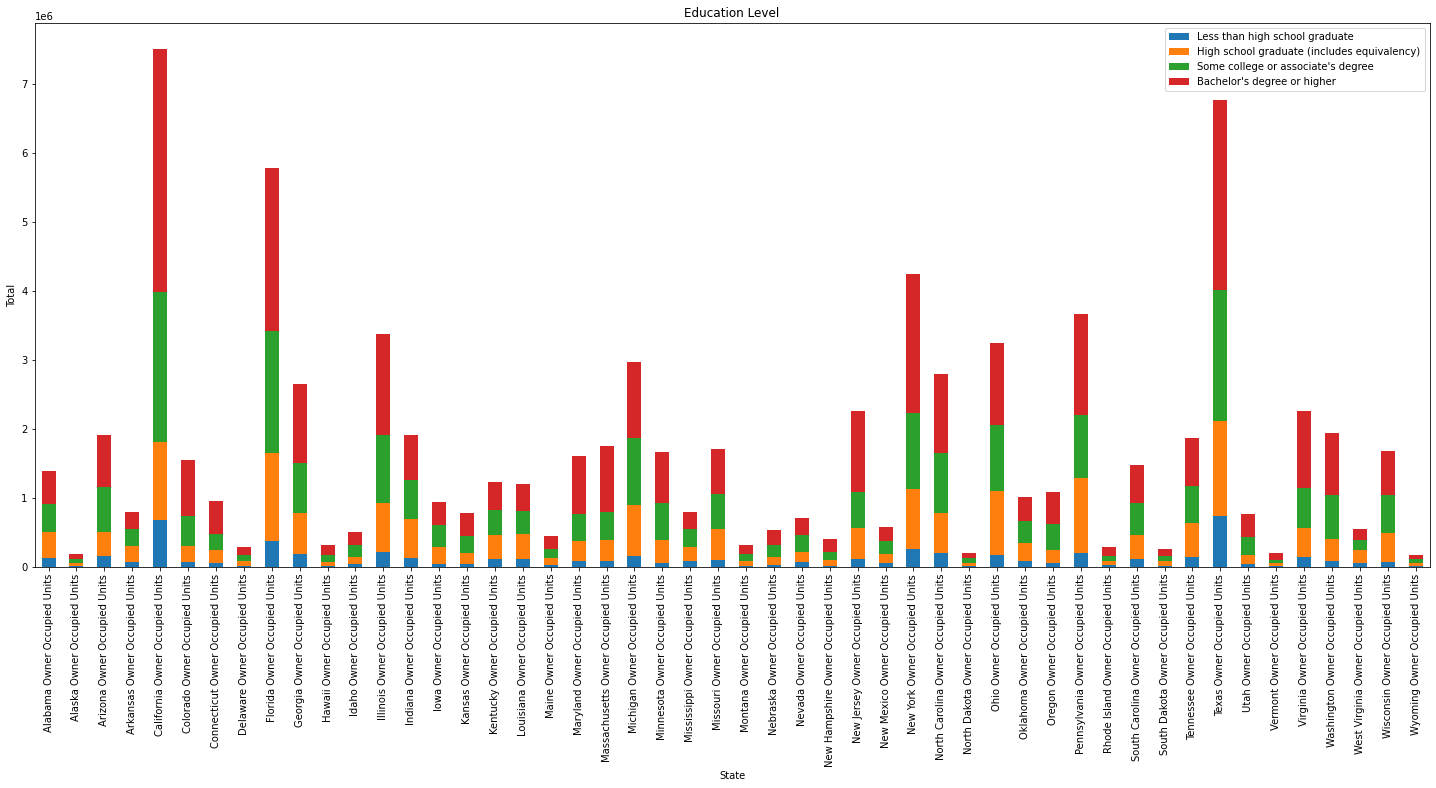

In [39]:
#plot a stacked bar for renters
fig, ax = plt.subplots(figsize=(25, 10))

df_owner_edu.plot(kind='bar', stacked=True, ax=ax) 

# Add Title and Labels
plt.title('Education Level')
plt.xlabel('State')
plt.ylabel('Total')

In [182]:
y_val = ['Less than high school graduate',
         'High school graduate (includes equivalency)',
         "Bachelor's degree or higher"]

df_r_edu = df_renter_edu.reset_index()
#melt the dataset to unpivot data
df_r_edu_melt = pd.melt(df_r_edu, id_vars = ['State']).sort_values(by=['value'], ascending=False)
df_r_edu_melt.head(10)

,State,variable,value
154,California Renter Occupied Units,Bachelor's degree or higher,1990537
104,California Renter Occupied Units,Some college or associate's degree,1759838
142,Texas Renter Occupied Units,Some college or associate's degree,1275083
181,New York Renter Occupied Units,Bachelor's degree or higher,1263314
54,California Renter Occupied Units,High school graduate (includes equivalency),1185353
192,Texas Renter Occupied Units,Bachelor's degree or higher,1155907
92,Texas Renter Occupied Units,High school graduate (includes equivalency),1001478
4,California Renter Occupied Units,Less than high school graduate,990629
108,Florida Renter Occupied Units,Some college or associate's degree,880850
131,New York Renter Occupied Units,Some college or associate's degree,833024


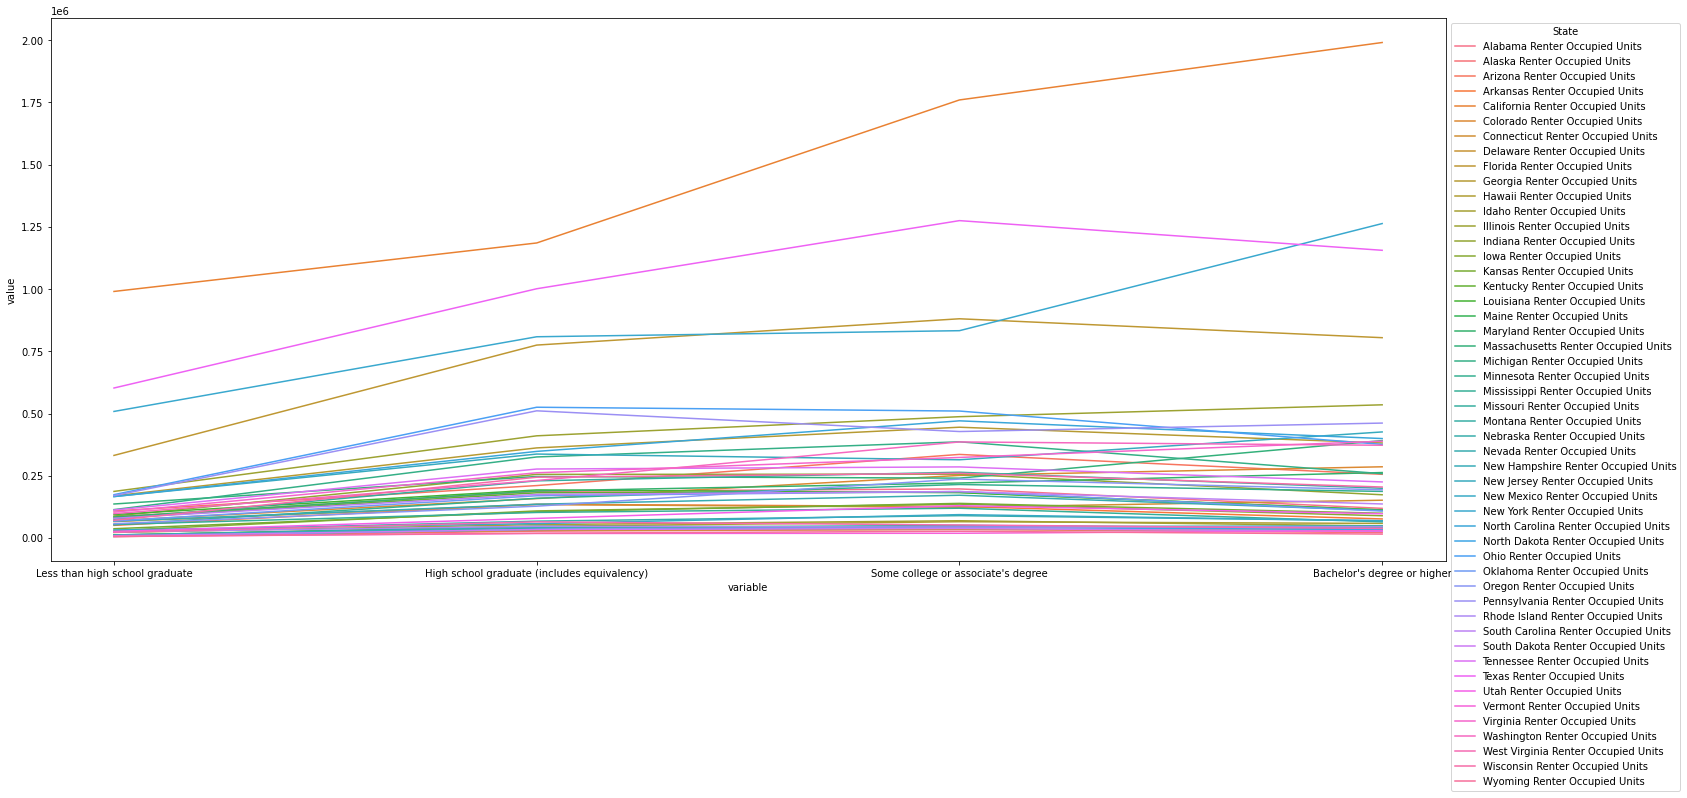

In [41]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.lineplot(data = df_r_edu_melt, x= 'variable', y='value', hue='State',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [183]:
y_val = ['Less than high school graduate',
         'High school graduate (includes equivalency)',
         "Bachelor's degree or higher"]

df_o_edu = df_owner_edu.reset_index()
#melt the dataset to unpivot data
df_o_edu_melt = pd.melt(df_o_edu, id_vars = ['State']).sort_values(by=['value'], ascending=False)
df_o_edu_melt.head(10)

,State,variable,value
154,California Owner Occupied Units,Bachelor's degree or higher,3522598
192,Texas Owner Occupied Units,Bachelor's degree or higher,2749492
158,Florida Owner Occupied Units,Bachelor's degree or higher,2353390
104,California Owner Occupied Units,Some college or associate's degree,2181676
181,New York Owner Occupied Units,Bachelor's degree or higher,2020484
142,Texas Owner Occupied Units,Some college or associate's degree,1905035
108,Florida Owner Occupied Units,Some college or associate's degree,1774284
162,Illinois Owner Occupied Units,Bachelor's degree or higher,1464470
187,Pennsylvania Owner Occupied Units,Bachelor's degree or higher,1459953
92,Texas Owner Occupied Units,High school graduate (includes equivalency),1366918


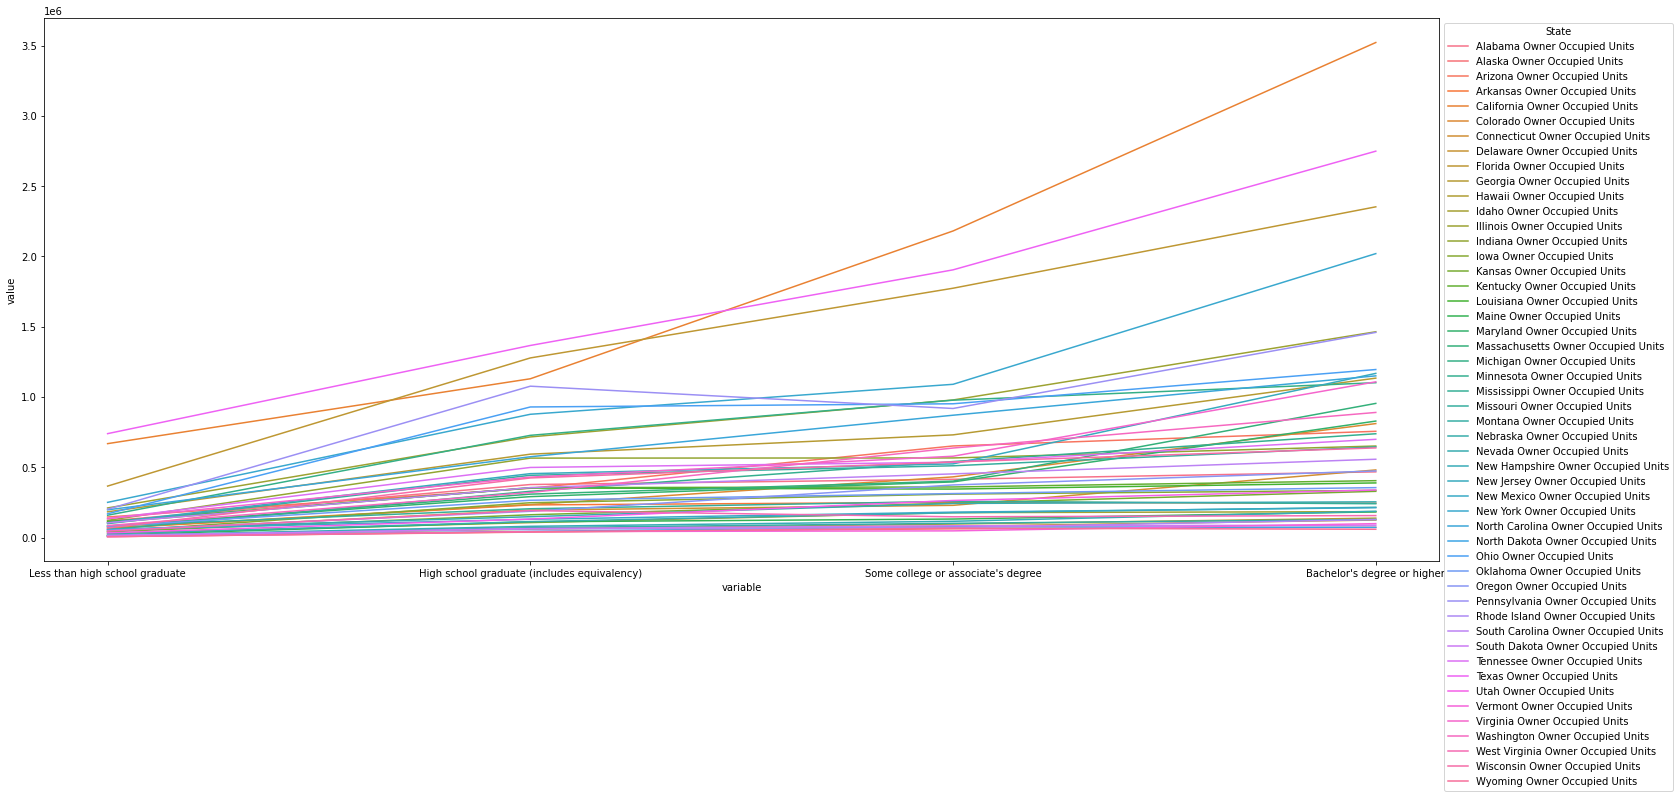

In [43]:
fig, ax = plt.subplots(figsize=(25, 10))

sns.lineplot(data = df_o_edu_melt, x= 'variable', y='value', hue='State',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

[Text(0, 0, 'Less than high school graduate'),
 Text(0, 0, 'High school graduate (includes equivalency)'),
 Text(0, 0, "Some college or associate's degree"),
 Text(0, 0, "Bachelor's degree or higher")]

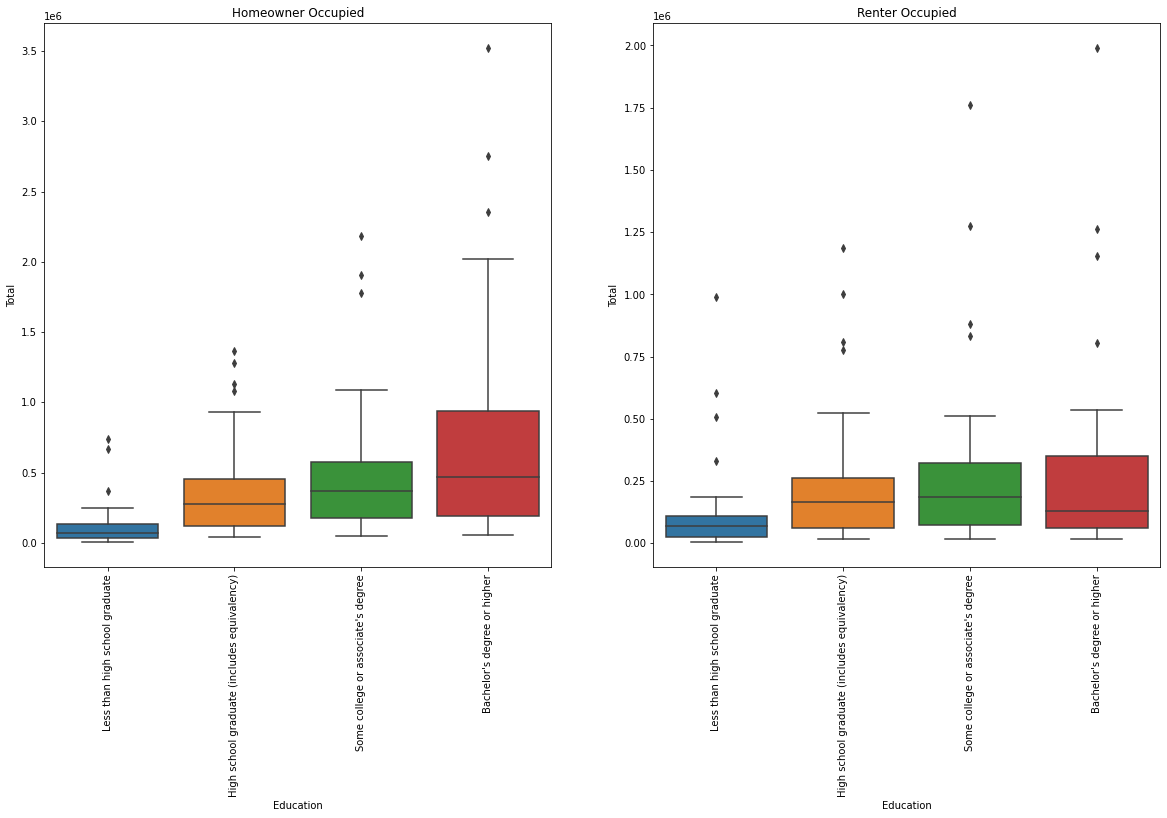

In [116]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(20, 10))

box_o = sns.boxplot(x="variable", y="value", data=df_o_edu_melt, ax=ax[0])
box_r = sns.boxplot(x="variable", y="value", data=df_r_edu_melt ,ax=ax[1])

box_o.set(xlabel='Education', ylabel='Total',title='Homeowner Occupied')
box_r.set(xlabel='Education', ylabel='Total', title='Renter Occupied')

box_o.set_xticklabels(box_o.get_xticklabels(), rotation=90)
box_r.set_xticklabels(box_r.get_xticklabels(), rotation=90)


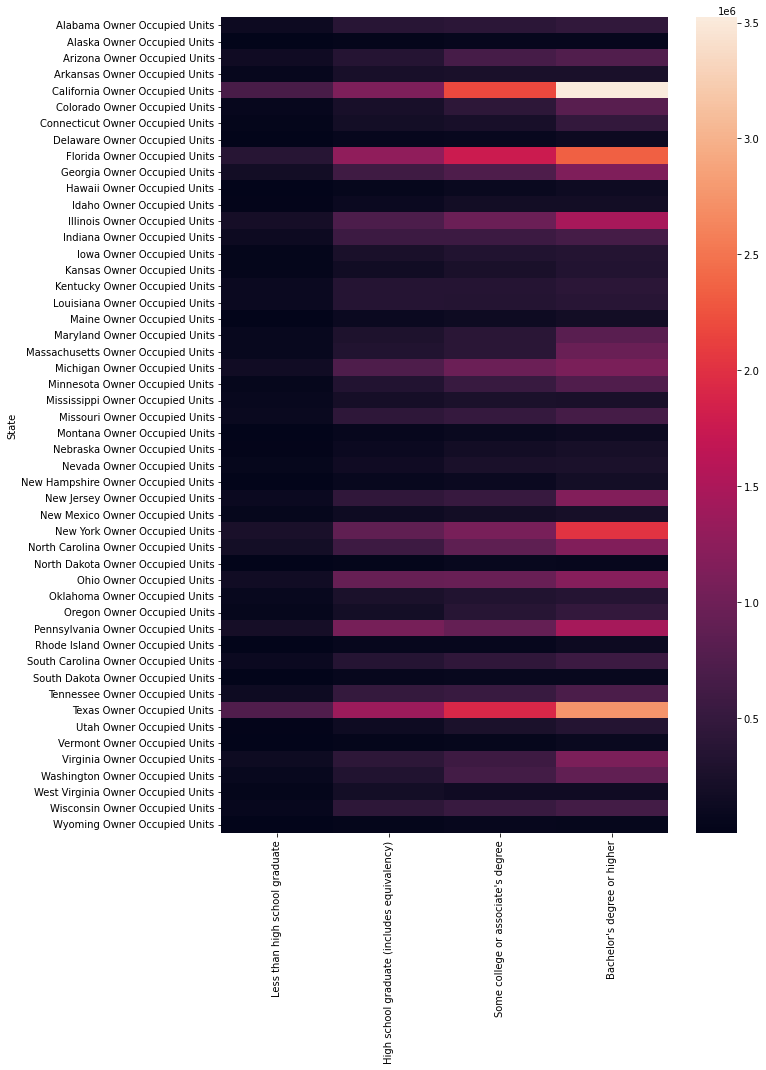

In [177]:
fig, ax = plt.subplots(figsize=(10, 15))

heat_owner = sns.heatmap(df_owner_edu,square=False, ax=ax)

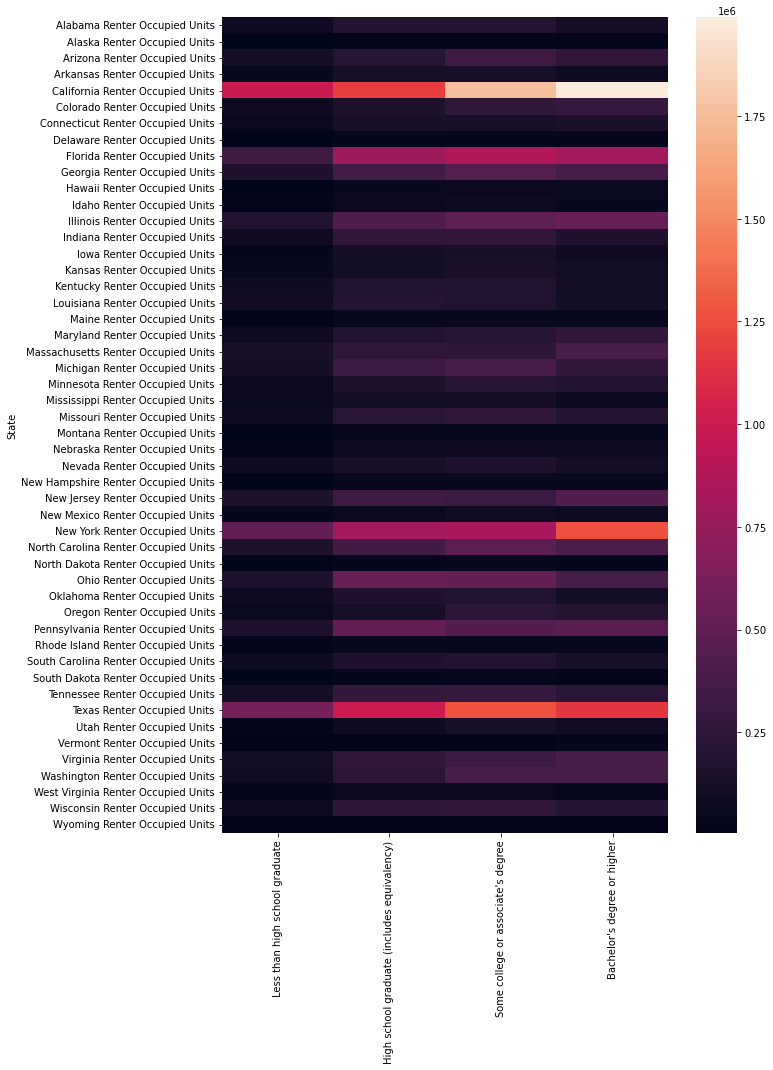

In [178]:
fig, ax = plt.subplots(figsize=(10, 15))

heat_renter = sns.heatmap(df_renter_edu,square=False, ax=ax)